In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from utils import get_tr_data, get_lipids_data

# Transcriptomis data

In [3]:
healthy_data = get_tr_data(True)
sz_data = get_tr_data(False)

In [4]:
common_genes = list(set(healthy_data.columns) & set(sz_data.columns) - set(["region", "batch"]))
A = healthy_data.groupby("region")[common_genes].apply(pd.Series.tolist).tolist()
A = np.array(A)
B = sz_data.groupby("region")[common_genes].apply(pd.Series.tolist).tolist()
B = np.array(B)

In [5]:
A.shape

(35, 4, 14177)

In [6]:
B.shape

(35, 4, 14177)

In [7]:
rng = np.random.default_rng()

In [17]:
N_SAMPLES = 50

In [18]:
h_synth = rng.choice(A, axis=1, size=N_SAMPLES).reshape(N_SAMPLES*35,-1)
sz_synth = rng.choice(B, axis=1, size=N_SAMPLES).reshape(N_SAMPLES*35,-1)

In [19]:
h_synth.shape

(1750, 14177)

In [20]:
pca = PCA(n_components=2, random_state=2093487)

In [21]:
pca_data_raw = np.concatenate([h_synth, sz_synth])

In [22]:
pca_data_raw.shape

(3500, 14177)

In [23]:
pca_data = pca.fit_transform(pca_data_raw)

In [24]:
pca_data.shape

(3500, 2)

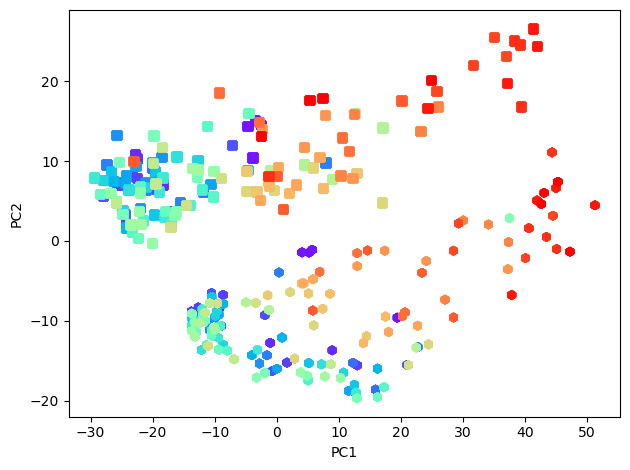

In [25]:
# import matplotlib.cm as cm
# cmap = cm.ScalarMappable(cmap='rainbow')
cmap = "rainbow"

plt.scatter(pca_data[:N_SAMPLES*35, 0], pca_data[:N_SAMPLES*35, 1], c=np.arange(N_SAMPLES*35), cmap=cmap, marker="h")
plt.scatter(pca_data[N_SAMPLES*35:, 0], pca_data[N_SAMPLES*35:, 1], c=np.arange(N_SAMPLES*35), cmap=cmap, marker="s")


# for i in range(len(pca_data)):
#     plt.annotate(annotations[i], (pca_data[i, 0], pca_data[i, 1]))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()    
# plt.savefig("../../data/intermediate/pics/genes_pca_all_regions.pdf", dpi=200)